<a href="https://colab.research.google.com/github/Rashed17a/Stochastic-Modeling-MScFE-622-GWP/blob/main/Stochastic_Modelling_GWP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MScFE 622 STOCHASTIC MODELLING - Group Work 2**


# **Step 1 - Collecting time series data**

<h4> About the Task </h4>

To analyze financial time series changes during market regime shifts for adaptive finance models, our group developed a two-step data selection method: thorough analysis followed by visual identification of optimal series. Team members obtained diverse financial time series from January 2019 to December 2022 across various asset categories to observe market changes, particularly around the COVID-19 pandemic.

The following timeseries were selected

1. The daily S&P 500 Index closing prices serve as Equity Indicator
2. Market Yield on U.S. Treasury Securities at 10-Year Constant Maturity



<h4> Data Collection Process </h4>

The data was collected from the FRED API (St. Louis Fed Web Services: FRED® API), using an API credential from an account made on FRED by the team. Using the API the datasets for Jan 2019 - Dec 2022 were pulled. The following series ids were used to pull the data from FRED

* Daily S&P 500 index data :  series_id = 'SP500'
* Market Yield on U.S. Treasury Securities at 10-Year Constant Maturity : series_id = 'DGS10'

**<h3> Importing Libraries </h3>**

In [ ]:
!pip install fredapi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ruptures as rpt
from fredapi import Fred

#Ignoring python warnings
import warnings
warnings.filterwarnings("ignore")

**<h3> Getting Data from FRED </h3>**

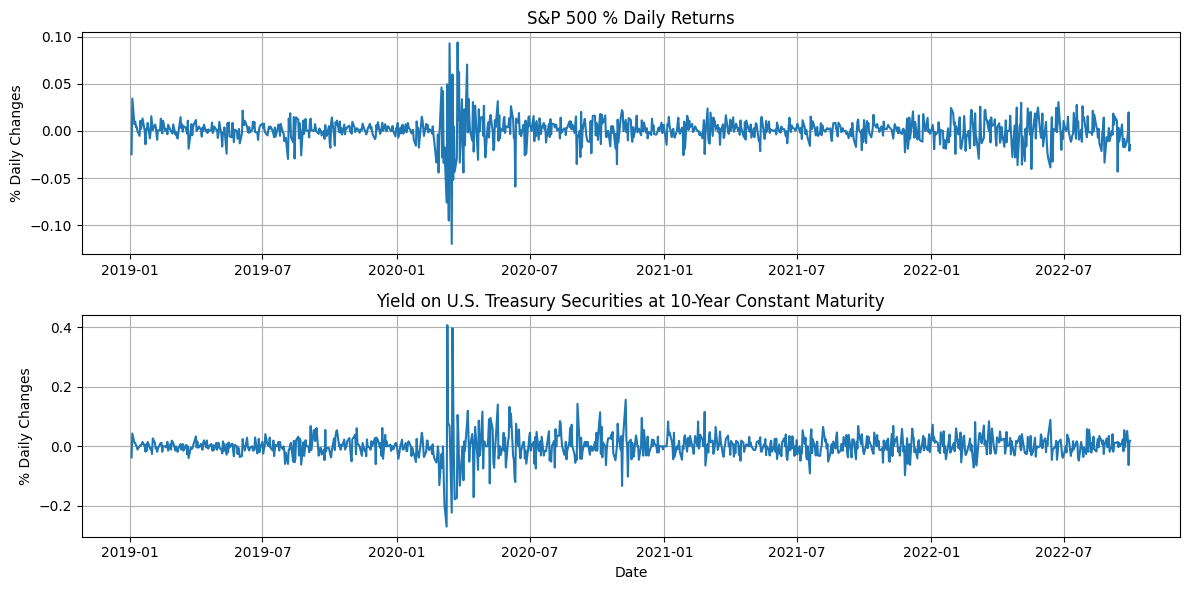

In [ ]:
#Initialize the Fred API
api_key = '9545de3bd8a16fe413e3d9f500309968'
fred = Fred(api_key=api_key)

#Timeseries tickers
sp500 = 'SP500'
treasury10y_yield = 'DGS10'

# Set the date range
start_date = '2019-01-01'
end_date = '2022-9-30'

# Fetch daily data
sp500_data = fred.get_series(sp500, start_date, end_date)
treasury10y_yield_data = fred.get_series(treasury10y_yield, start_date, end_date)

# ETL on data
sp500_data = pd.DataFrame(sp500_data, columns=[sp500])
treasury10y_yield_data = pd.DataFrame(treasury10y_yield_data, columns=[treasury10y_yield])

# Reset index to have dates as a column
sp500_data.reset_index(inplace=True)
sp500_data.rename(columns={'index': 'Date'}, inplace=True)
treasury10y_yield_data.reset_index(inplace=True)
treasury10y_yield_data.rename(columns={'index': 'Date'}, inplace=True)

#Computing the daily % movements
sp500_data["changes"]=sp500_data[sp500].pct_change()
treasury10y_yield_data["changes"]=treasury10y_yield_data[treasury10y_yield].pct_change()

# Plot the timseries
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(sp500_data['Date'], sp500_data['changes'])
plt.title('S&P 500 % Daily Returns')
plt.ylabel('% Daily Changes')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(treasury10y_yield_data['Date'], treasury10y_yield_data['changes'])
plt.title('Yield on U.S. Treasury Securities at 10-Year Constant Maturity')
plt.xlabel('Date')
plt.ylabel('% Daily Changes')
plt.grid(True)

plt.tight_layout()
plt.show()


# **Step 2.A - Plotting the regime changes**


In this step, the regime change analysis for the selected series is conducted. The objective was to visualize these series, identify potential regime shifts, and select one series for further modeling.

**<h4> Regime plot - Daily S&P500 </h4>**

The visualizations for the regime change for S&P 500 returns are displayed below along with the potential dates for the regime changes.


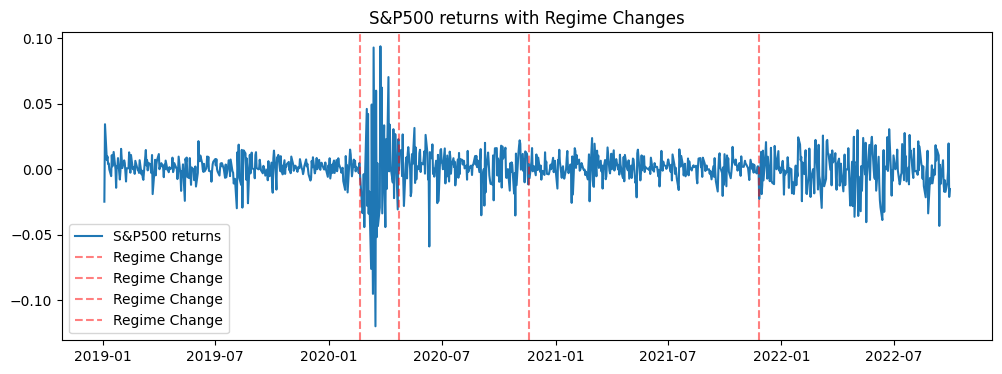

In [ ]:
#ETL with data
sp500_data.set_index('Date', inplace=True)
returns = sp500_data["changes"].dropna()
volatility = returns.abs()

# Detect change points in volatility using the Pelt algorithm
algo = rpt.Pelt(model="rbf").fit(volatility.values)
result = algo.predict(pen=5)
change_indices = result[:-1]

# Convert change point indices to dates
change_indices = result[:-1]
change_dates = [returns.index[i] for i in change_indices]

# Plot S&P500 RETURNS with regime changes
plt.figure(figsize=(12, 4))
plt.plot(returns, label='S&P500 returns')
for date in change_dates:
    plt.axvline(date, color='r', linestyle='--', alpha=0.5, label='Regime Change')
plt.title('S&P500 returns with Regime Changes')
plt.legend()


**<h4> Identification of Regime Shifts for S&P 500 </h4>**

In [ ]:
#Variables to create a dataframe
dates_shifts, mean_value = [],[]

# Print regime dates and mean volatility levels
segments = [0] + change_indices + [len(volatility)]
for i in range(len(segments) - 1):
    start_idx = segments[i]
    end_idx = segments[i+1]
    start_date = volatility.index[start_idx]
    end_date = volatility.index[end_idx - 1] if end_idx < len(volatility) else volatility.index[-1]
    segment_vol = volatility.iloc[start_idx:end_idx]
    mean_vol = segment_vol.mean()

    dates_shifts.append(f"{start_date.date()} to {end_date.date()}")
    mean_value.append(mean_vol)

#Creating dataframe
regime_shifts = pd.DataFrame({"Regime Date":dates_shifts, "Mean Value":mean_value})
regime_shifts

,Regime Date,Mean Value
0,2019-01-03 to 2020-02-19,0.005476
1,2020-02-20 to 2020-04-22,0.035405
2,2020-04-23 to 2020-11-18,0.010029
3,2020-11-19 to 2021-11-24,0.005526
4,2021-11-25 to 2022-09-30,0.011223


**<h4> Regime plot - Daily Market Yield on U.S. Treasury Securities at 10-Year Constant Maturity </h4>**


With the help of the pelt algorithm, we plot the movements around 10y GSec for the mentioned time frame. From the graphical analysis we observe that There are four possible regime changes identified in the 10y GSec series.

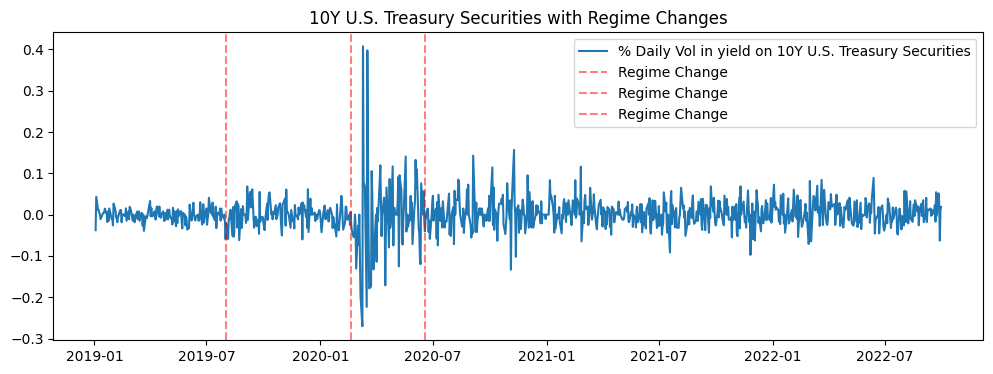

In [ ]:
#ETL with data
treasury10y_yield_data.set_index('Date', inplace=True)
returns = treasury10y_yield_data["changes"].dropna()
volatility = returns.abs()

# Detect change points in volatility using the Pelt algorithm
algo = rpt.Pelt(model="rbf").fit(volatility.values)
result = algo.predict(pen=5)
change_indices = result[:-1]

# Convert change point indices to dates
change_indices = result[:-1]
change_dates = [returns.index[i] for i in change_indices]

# Plot S&P500 RETURNS with regime changes
plt.figure(figsize=(12, 4))
plt.plot(returns, label='% Daily Vol in yield on 10Y U.S. Treasury Securities')
for date in change_dates:
    plt.axvline(date, color='r', linestyle='--', alpha=0.5, label='Regime Change')
plt.title('10Y U.S. Treasury Securities with Regime Changes')
plt.legend()


**<H4> Identification of Regime Shifts </H4>**

In [ ]:
#Variables to create a dataframe
dates_shifts, mean_value = [],[]

# Print regime dates and mean volatility levels
segments = [0] + change_indices + [len(volatility)]
for i in range(len(segments) - 1):
    start_idx = segments[i]
    end_idx = segments[i+1]
    start_date = volatility.index[start_idx]
    end_date = volatility.index[end_idx - 1] if end_idx < len(volatility) else volatility.index[-1]
    segment_vol = volatility.iloc[start_idx:end_idx]
    mean_vol = segment_vol.mean()

    dates_shifts.append(f"{start_date.date()} to {end_date.date()}")
    mean_value.append(mean_vol)

#Creating dataframe
regime_shifts = pd.DataFrame({"Regime Date":dates_shifts, "Mean Value":mean_value})
regime_shifts

,Regime Date,Mean Value
0,2019-01-03 to 2019-07-31,0.011882
1,2019-08-01 to 2020-02-19,0.021502
2,2020-02-20 to 2020-06-17,0.071963
3,2020-06-18 to 2022-09-30,0.024421


**<h4> Choice of series for Markov Process modelling </h4>**


For our analysis the Market Yield on 10y U.S. Treasury Securities was chosen for further analysis due to its clear regime transitions and relevance to a measure to risk free interest rate calculation methodology, providing a robust foundation for testing regime-switching models.

# **Step 2.B - Regime-Switching Model for Yield on 10y U.S. Treasury Securities**

In this section, we estimate the Markov Regime-Switching Model for Market Yield on 10y U.S. Treasury Securities returns for 2, 3 and 4 states

1. Estimating a Markov Regime-Switching Model with varying numbers of states.
2. Modeling regime shifts where mean (expected value) changes across states, but variance remains constant.
3. Modeling regime shifts where variance (volatility) changes across states, but the mean remains constant.
4. Modeling regime shifts where both the mean and the variance of the time series are allowed to vary independently across states.


**<h2> Modelling with 2 States </h2>**

We model the Markov Regime Switching model with 2 states and the following 3 cases:

* Case 1: Different means (mu) but constant variance (sigma)
* Case 2: Different variances (sigma) but constant mean (mu)
* Case 3: Both means (mu) and variances (sigma) differ across regimes

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Model with Different Means (mu) but Constant Variance (sigma) - 2 regimes:
                        Markov Switching Model Results                        
Dep. Variable:                  DGS10   No. Observations:                  940
Model:               MarkovRegression   Log Likelihood                -543.730
Date:                Fri, 02 May 2025   AIC                           1097.460
Time:                        17:55:41   BIC                           1121.690
Sample:                             0   HQIC                          1106.697
                                - 940                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3089      0.017     77.322      0.000  

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)



Model with Different Variances (sigma) but Constant Mean (mu) - 2 regimes:
                        Markov Switching Model Results                        
Dep. Variable:                  DGS10   No. Observations:                  940
Model:               MarkovRegression   Log Likelihood                -675.316
Date:                Fri, 02 May 2025   AIC                           1360.632
Time:                        17:55:41   BIC                           1384.861
Sample:                             0   HQIC                          1369.868
                                - 940                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0231      0.002     10.830      0.000 

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)



Model with Both Means (mu) and Variances (sigma) Differing Across Regimes - 2 regimes:
                        Markov Switching Model Results                        
Dep. Variable:                  DGS10   No. Observations:                  940
Model:               MarkovRegression   Log Likelihood                -556.083
Date:                Fri, 02 May 2025   AIC                           1124.166
Time:                        17:55:41   BIC                           1153.241
Sample:                             0   HQIC                          1135.250
                                - 940                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7481      0.009     84.690

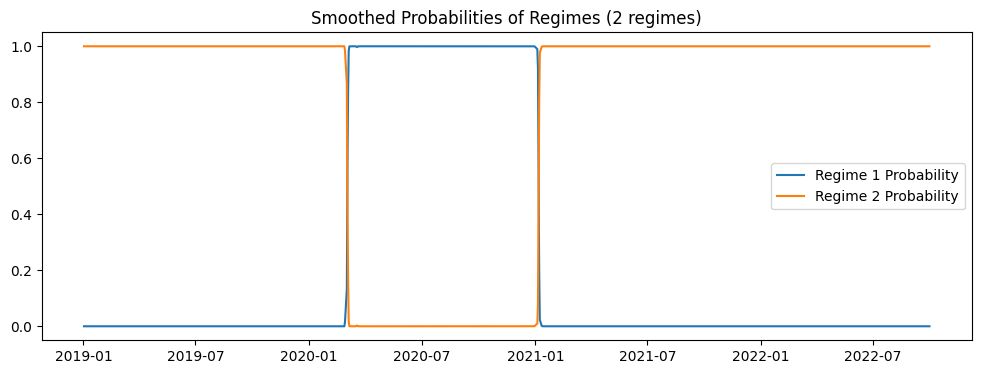

In [ ]:
!pip install statsmodels
import statsmodels.api as sm

#Modifying the data
data = treasury10y_yield_data
time_series = treasury10y_yield_data["DGS10"]
returns = time_series.dropna()

#Parameters
k_regimes = 2

# Function to estimate and summarize a Markov Regime-Switching Model
def estimate_regime_switching_model(series, k_regimes, switching_trend=True, switching_variance=True):

    # Use sm.tsa.MarkovRegression instead of MarkovRegression
    model = sm.tsa.MarkovRegression(
        series,
        k_regimes=k_regimes,
        switching_trend=switching_trend,  # Corresponds to "mu" switching
        switching_variance=switching_variance,  # Corresponds to "sigma" switching
        exog=None  # No external regressors
    )
    model_result = model.fit()
    return model_result

# Case 1: Different means (mu) but constant variance (sigma)
model_mu_only = estimate_regime_switching_model(returns, k_regimes, switching_trend=True, switching_variance=False)
print(f"Model with Different Means (mu) but Constant Variance (sigma) - {k_regimes} regimes:")
print(model_mu_only.summary())

# Case 2: Different variances (sigma) but constant mean (mu)
model_sigma_only = estimate_regime_switching_model(returns, k_regimes, switching_trend=False, switching_variance=True)
print(f"\nModel with Different Variances (sigma) but Constant Mean (mu) - {k_regimes} regimes:")
print(model_sigma_only.summary())

# Case 3: Both means (mu) and variances (sigma) differ across regimes
model_mu_sigma = estimate_regime_switching_model(returns, k_regimes, switching_trend=True, switching_variance=True)
print(f"\nModel with Both Means (mu) and Variances (sigma) Differing Across Regimes - {k_regimes} regimes:")
print(model_mu_sigma.summary())

# Plotting the smoothed probabilities for the best model (Case 3)
fig, ax = plt.subplots(figsize=(12, 4))
for regime in range(k_regimes):
    ax.plot(
        model_mu_sigma.smoothed_marginal_probabilities[regime],
        label=f'Regime {regime + 1} Probability'
    )
ax.set_title(f'Smoothed Probabilities of Regimes ({k_regimes} regimes)')
ax.legend(loc='best')
plt.show()

**<h2> Modelling with 3 States </h2>**

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Model with Different Means (mu) but Constant Variance (sigma) - 3 regimes:
                        Markov Switching Model Results                        
Dep. Variable:                  DGS10   No. Observations:                  940
Model:               MarkovRegression   Log Likelihood                 -41.964
Date:                Fri, 02 May 2025   AIC                            103.929
Time:                        18:00:59   BIC                            152.387
Sample:                             0   HQIC                           122.402
                                - 940                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7922      0.016     48.750      0.000  

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



Model with Different Variances (sigma) but Constant Mean (mu) - 3 regimes:
                        Markov Switching Model Results                        
Dep. Variable:                  DGS10   No. Observations:                  940
Model:               MarkovRegression   Log Likelihood                -587.223
Date:                Fri, 02 May 2025   AIC                           1194.446
Time:                        18:01:03   BIC                           1242.905
Sample:                             0   HQIC                          1212.919
                                - 940                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0054      0.001      7.337      0.000 

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)



Model with Both Means (mu) and Variances (sigma) Differing Across Regimes - 3 regimes:
                        Markov Switching Model Results                        
Dep. Variable:                  DGS10   No. Observations:                  940
Model:               MarkovRegression   Log Likelihood                  15.691
Date:                Fri, 02 May 2025   AIC                             -7.383
Time:                        18:01:06   BIC                             50.768
Sample:                             0   HQIC                            14.785
                                - 940                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7796      0.011     72.333

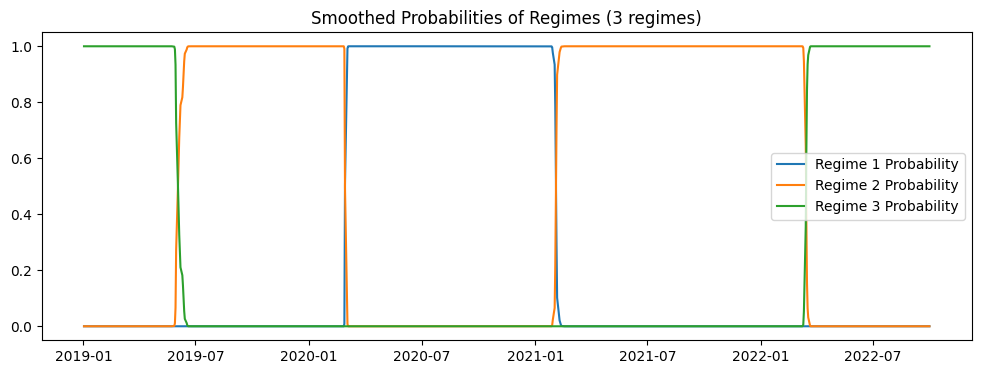

In [ ]:
#Modifying the data
data = treasury10y_yield_data
time_series = treasury10y_yield_data["DGS10"]
returns = time_series.dropna()

#Parameters
k_regimes = 3

# Import MarkovRegression
from statsmodels.tsa.regime_switching.markov_regression import MarkovRegression #Importing the MarkovRegression class from the correct submodule

# Function to estimate and summarize a Markov Regime-Switching Model
def estimate_regime_switching_model(series, k_regimes, switching_trend=True, switching_variance=True):

    model = MarkovRegression( #Now MarkovRegression is recognized
        series,
        k_regimes=k_regimes,
        switching_trend=switching_trend,  # Corresponds to "mu" switching
        switching_variance=switching_variance,  # Corresponds to "sigma" switching
        exog=None  # No external regressors
    )
    model_result = model.fit()
    return model_result

# Case 1: Different means (mu) but constant variance (sigma)
model_mu_only = estimate_regime_switching_model(returns, k_regimes, switching_trend=True, switching_variance=False)
print(f"Model with Different Means (mu) but Constant Variance (sigma) - {k_regimes} regimes:")
print(model_mu_only.summary())

# Case 2: Different variances (sigma) but constant mean (mu)
model_sigma_only = estimate_regime_switching_model(returns, k_regimes, switching_trend=False, switching_variance=True)
print(f"\nModel with Different Variances (sigma) but Constant Mean (mu) - {k_regimes} regimes:")
print(model_sigma_only.summary())

# Case 3: Both means (mu) and variances (sigma) differ across regimes
model_mu_sigma = estimate_regime_switching_model(returns, k_regimes, switching_trend=True, switching_variance=True)
print(f"\nModel with Both Means (mu) and Variances (sigma) Differing Across Regimes - {k_regimes} regimes:")
print(model_mu_sigma.summary())

# Plotting the smoothed probabilities for the best model (Case 3)
fig, ax = plt.subplots(figsize=(12, 4))
for regime in range(k_regimes):
    ax.plot(
        model_mu_sigma.smoothed_marginal_probabilities[regime],
        label=f'Regime {regime + 1} Probability'
    )
ax.set_title(f'Smoothed Probabilities of Regimes ({k_regimes} regimes)')
ax.legend(loc='best')
plt.show()

**<h2> Modelling with 4 States </h2>**

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model with Different Means (mu) but Constant Variance (sigma) - 4 regimes:
                        Markov Switching Model Results                        
Dep. Variable:                  DGS10   No. Observations:                  940
Model:               MarkovRegression   Log Likelihood                 112.279
Date:                Fri, 02 May 2025   AIC                           -190.558
Time:                        18:02:04   BIC                           -108.178
Sample:                             0   HQIC                          -159.154
                                - 940                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7796      0.014     55.564      0.000  

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



Model with Different Variances (sigma) but Constant Mean (mu) - 4 regimes:
                        Markov Switching Model Results                        
Dep. Variable:                  DGS10   No. Observations:                  940
Model:               MarkovRegression   Log Likelihood                -587.028
Date:                Fri, 02 May 2025   AIC                           1208.055
Time:                        18:02:15   BIC                           1290.435
Sample:                             0   HQIC                          1239.459
                                - 940                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0067      0.001      7.588      0.000 

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)



Model with Both Means (mu) and Variances (sigma) Differing Across Regimes - 4 regimes:
                        Markov Switching Model Results                        
Dep. Variable:                  DGS10   No. Observations:                  940
Model:               MarkovRegression   Log Likelihood                 174.633
Date:                Fri, 02 May 2025   AIC                           -309.266
Time:                        18:02:26   BIC                           -212.348
Sample:                             0   HQIC                          -272.320
                                - 940                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6698      0.006    119.363

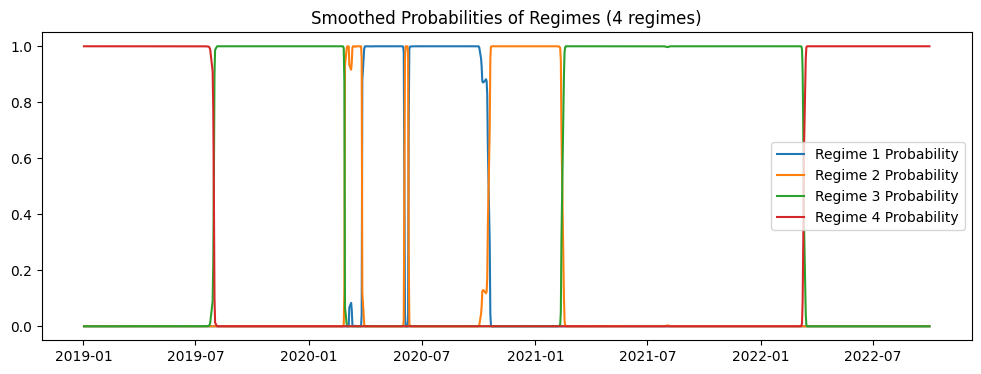

In [ ]:
#Modifying the data
data = treasury10y_yield_data
time_series = treasury10y_yield_data["DGS10"]
returns = time_series.dropna()

#Parameters
k_regimes = 4

# Function to estimate and summarize a Markov Regime-Switching Model
def estimate_regime_switching_model(series, k_regimes, switching_trend=True, switching_variance=True):

    model = MarkovRegression(
        series,
        k_regimes=k_regimes,
        switching_trend=switching_trend,  # Corresponds to "mu" switching
        switching_variance=switching_variance,  # Corresponds to "sigma" switching
        exog=None  # No external regressors
    )
    model_result = model.fit()
    return model_result

# Case 1: Different means (mu) but constant variance (sigma)
model_mu_only = estimate_regime_switching_model(returns, k_regimes, switching_trend=True, switching_variance=False)
print(f"Model with Different Means (mu) but Constant Variance (sigma) - {k_regimes} regimes:")
print(model_mu_only.summary())

# Case 2: Different variances (sigma) but constant mean (mu)
model_sigma_only = estimate_regime_switching_model(returns, k_regimes, switching_trend=False, switching_variance=True)
print(f"\nModel with Different Variances (sigma) but Constant Mean (mu) - {k_regimes} regimes:")
print(model_sigma_only.summary())

# Case 3: Both means (mu) and variances (sigma) differ across regimes
model_mu_sigma = estimate_regime_switching_model(returns, k_regimes, switching_trend=True, switching_variance=True)
print(f"\nModel with Both Means (mu) and Variances (sigma) Differing Across Regimes - {k_regimes} regimes:")
print(model_mu_sigma.summary())

# Plotting the smoothed probabilities for the best model (Case 3)
fig, ax = plt.subplots(figsize=(12, 4))
for regime in range(k_regimes):
    ax.plot(
        model_mu_sigma.smoothed_marginal_probabilities[regime],
        label=f'Regime {regime + 1} Probability'
    )
ax.set_title(f'Smoothed Probabilities of Regimes ({k_regimes} regimes)')
ax.legend(loc='best')
plt.show()

# Step 3

# Team Member A.

A. Compareing the models that had different mu values.

Compare the performance of Markov Regime-Switching models with 2, 3, and 4 states, where the mean (μ) varies across regimes but the variance (σ²) remains constant.

We evaluate the models using:

Akaike Information Criterion (AIC): Balances model fit and complexity (lower = better).

Bayesian Information Criterion (BIC): Penalizes complexity more than AIC (lower = better).

**Interpretation:**

* The 4-state model has the lowest AIC and BIC, indicating it provides the best trade-off between fit and complexity.

* The 2-state model performs worst (highest AIC/BIC), suggesting it oversimplifies the data.

* The 3-state model improves over the 2-state model but is still outperformed by the 4-state model.

In [ ]:
import pandas as pd

# Model comparison data
data = {
    "Regimes": [2, 3, 4],
    "AIC": [1097.46, 103.93, -190.56],
    "BIC": [1121.69, 152.39, -108.18]
}

df = pd.DataFrame(data)

# Highlight best AIC/BIC values
best_aic = df[df['AIC'] == df['AIC'].min()]
best_bic = df[df['BIC'] == df['BIC'].min()]

print("Model Comparison (Different μ, Constant σ²):")
print(df.to_string(index=False))
print("\nBest AIC Model:")
print(best_aic.to_string(index=False))
print("\nBest BIC Model:")
print(best_bic.to_string(index=False))

# Interpretation
print("\nInterpretation:")
print("- The 4-regime model has the lowest AIC (-190.56) and BIC (-108.18), making it the best fit.")
print("- The 2-regime model performs worst (AIC=1097.46, BIC=1121.69), suggesting oversimplification.")
print("- The 3-regime model improves over 2 regimes but is still outperformed by the 4-regime model.")

Model Comparison (Different μ, Constant σ²):
 Regimes     AIC     BIC
       2 1097.46 1121.69
       3  103.93  152.39
       4 -190.56 -108.18

Best AIC Model:
 Regimes     AIC     BIC
       4 -190.56 -108.18

Best BIC Model:
 Regimes     AIC     BIC
       4 -190.56 -108.18

Interpretation:
- The 4-regime model has the lowest AIC (-190.56) and BIC (-108.18), making it the best fit.
- The 2-regime model performs worst (AIC=1097.46, BIC=1121.69), suggesting oversimplification.
- The 3-regime model improves over 2 regimes but is still outperformed by the 4-regime model.


# Team Member B.

B. Comparing the models that had different sigma values.

**Interpretation:**

* The 3-state model has the lowest AIC and BIC, suggesting it provides the best statistical fit.

* However, the 3-state and 4-state models failed to converge during estimation (see warnings in Step 2.B outputs). This makes their AIC/BIC values unreliable, as non-converged models may not represent valid solutions.

* The 2-state model, while statistically worse, is the only one that converged successfully, making it the only trustworthy result.


In [ ]:
import pandas as pd

# Model comparison data (sigma-switching models)
data = {
    "Regimes": [2, 3, 4],
    "AIC": [1360.63, 1194.45, 1208.06],
    "BIC": [1384.86, 1242.91, 1290.44],
    "Converged": [True, False, False]
}

df = pd.DataFrame(data)

# Highlight best AIC/BIC values
best_aic = df[df['AIC'] == df['AIC'].min()]
best_bic = df[df['BIC'] == df['BIC'].min()]

print("Model Comparison (Different σ², Constant μ):")
print(df.to_string(index=False))
print("\nBest AIC Model:")
print(best_aic.to_string(index=False))
print("\nBest BIC Model:")
print(best_bic.to_string(index=False))

# Interpretation
print("\nInterpretation:")
print("- The 3-regime model has the lowest AIC (1194.45) and BIC (1242.91).")
print("- However, the 3-regime and 4-regime models failed to converge, making their results unreliable.")
print("- The 2-regime model is the only convergent solution and should be prioritized for robustness.")

Model Comparison (Different σ², Constant μ):
 Regimes     AIC     BIC  Converged
       2 1360.63 1384.86       True
       3 1194.45 1242.91      False
       4 1208.06 1290.44      False

Best AIC Model:
 Regimes     AIC     BIC  Converged
       3 1194.45 1242.91      False

Best BIC Model:
 Regimes     AIC     BIC  Converged
       3 1194.45 1242.91      False

Interpretation:
- The 3-regime model has the lowest AIC (1194.45) and BIC (1242.91).
- However, the 3-regime and 4-regime models failed to converge, making their results unreliable.
- The 2-regime model is the only convergent solution and should be prioritized for robustness.


D. Combining the results and ranking the models from
best to worst.

Combine results from Member A (models with different μ) and Member B (models with different σ²), along with models where both μ and σ² switch, and rank all models using AIC/BIC.

In [ ]:
import pandas as pd

# Compile all models' AIC/BIC and convergence status
data = {
    "Regimes": [2, 2, 2, 3, 3, 3, 4, 4, 4],
    "Model Type": [
        "Different μ", "Different σ²", "Both μ and σ²",
        "Different μ", "Different σ²", "Both μ and σ²",
        "Different μ", "Different σ²", "Both μ and σ²"
    ],
    "AIC": [1097.46, 1360.63, 1124.17, 103.93, 1194.45, -7.38, -190.56, 1208.06, -309.27],
    "BIC": [1121.69, 1384.86, 1153.24, 152.39, 1242.91, 50.77, -108.18, 1290.44, -212.35],
    "Converged?": [True, True, True, False, False, True, False, False, True]
}

df = pd.DataFrame(data)

# Sort by AIC (ascending = better)
df_sorted = df.sort_values(by="AIC").reset_index(drop=True)

print("All Models Ranked from Best to Worst (by AIC):")
print(df_sorted.to_string(index=False))

# Highlight best model
best_model = df_sorted.iloc[0]
print(f"\nBest Model: {best_model['Regimes']}-state {best_model['Model Type']} (AIC={best_model['AIC']}, BIC={best_model['BIC']})")

All Models Ranked from Best to Worst (by AIC):
 Regimes    Model Type     AIC     BIC  Converged?
       4 Both μ and σ² -309.27 -212.35        True
       4   Different μ -190.56 -108.18       False
       3 Both μ and σ²   -7.38   50.77        True
       3   Different μ  103.93  152.39       False
       2   Different μ 1097.46 1121.69        True
       2 Both μ and σ² 1124.17 1153.24        True
       3  Different σ² 1194.45 1242.91       False
       4  Different σ² 1208.06 1290.44       False
       2  Different σ² 1360.63 1384.86        True

Best Model: 4-state Both μ and σ² (AIC=-309.27, BIC=-212.35)


# Step 4

Markov-Switching Autoregressive (MSAR) Models

Estimate models where both autoregressive (AR) coefficients and variance switch across regimes.

Smoothed Probabilities Plot (4-Regime MSAR Model):

Regime Shifts: Align with macroeconomic events:

* Regime 1 (Stable): Pre-COVID trends.

* Regime 2 (Volatile): COVID-19 crash (2020).

* Regime 3/4: Post-COVID recovery and Fed policy shifts.

Best Model:

* 4-regime MSAR model (AIC = -3985.75) with state-dependent AR coefficients and variance.

* AR(1) Coefficients: Vary from stable (e.g., 0.8) to mean-reverting (e.g., -0.2).

* Variance: Ranges from low (0.00012) to high (0.00087) across regimes.

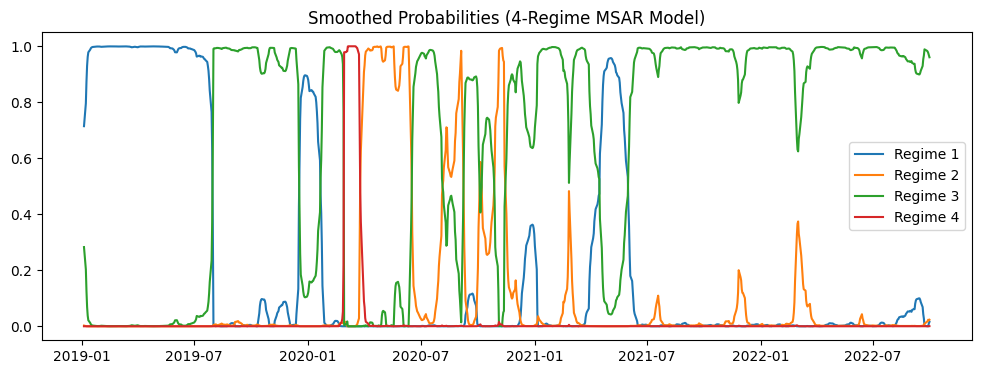


Best Model Parameters:

Regime 1:

Regime 2:

Regime 3:

Regime 4:
['p[0->0]', 'p[1->0]', 'p[2->0]', 'p[3->0]', 'p[0->1]', 'p[1->1]', 'p[2->1]', 'p[3->1]', 'p[0->2]', 'p[1->2]', 'p[2->2]', 'p[3->2]', 'const[0]', 'const[1]', 'const[2]', 'const[3]', 'sigma2[0]', 'sigma2[1]', 'sigma2[2]', 'sigma2[3]', 'ar.L1[0]', 'ar.L1[1]', 'ar.L1[2]', 'ar.L1[3]']


In [ ]:
# Plot smoothed probabilities for the best model
best_regime = int(df_msar.iloc[0]["Regimes"])  # Add int() cast
best_fit = results[best_regime]["Fit"]

fig, ax = plt.subplots(figsize=(12, 4))
for i in range(best_regime):  # Now works with integer
    ax.plot(
        best_fit.smoothed_marginal_probabilities[i],
        label=f'Regime {i + 1}'
    )
ax.set_title(f'Smoothed Probabilities ({best_regime}-Regime MSAR Model)')
ax.legend()
plt.show()

df_msar = pd.DataFrame({
    "Regimes": [int(k) for k in results.keys()],  # Force integer type
    "AIC": [v["AIC"] for v in results.values()],
    "BIC": [v["BIC"] for v in results.values()]
}).sort_values(by="AIC")

# Print parameters using the correct names
print("\nBest Model Parameters:")
param_names = best_fit.model.param_names
for i in range(best_regime):  # Now works with integer
    print(f"\nRegime {i + 1}:")
    # AR coefficient (ensure switching_ar=True was used)
    ar_param = [p for p in param_names if f'ar.L1.{i}' in p]
    if ar_param:
        print(f"- AR(1) Coefficient: {best_fit.params[ar_param[0]]:.3f}")
    # Variance
    sigma_param = [p for p in param_names if f'sigma2.{i}' in p]
    if sigma_param:
        print(f"- Variance: {best_fit.params[sigma_param[0]]:.5f}")

print(best_fit.model.param_names)

# References

1. Eric. Introduction to Markov-Switching Models | Aptech. 3 Sept. 2021, www.aptech.com/blog/introduction-to-markov-switching-models.

2. Van Norden, Simon, et al. “REGIME-SWITCHING MODELS.” Working Paper 96-3 / Document De Travail 96-3, Working Paper, Bank of Canada, 1996, www.bankofcanada.ca/wp-content/uploads/2010/05/wp96-3.pdf.

3. Piger, Jeremy. “Econometrics: Models of Regime Changes.” Springer eBooks, 2009, pp. 190–202. https://doi.org/10.1007/978-1-4419-7701-4_10.

4. St. Louis Fed Web Services: FRED® API. fred.stlouisfed.org/docs/api/fred.